# CRISP DM

In [ ]:
Bussines Understanding

- Problem
Ada beberapa faktor yang menyebabkan suatu negara mengalami krisis ekonomi, mulai dari inflasi, hutang
negara yang berlebihan, dan lainnya. Banyak negara di dunia yang mengalami krisis ekonomi, terutama
negara di benua Afrika. Dataset ini secara khusus berfokus pada Perbankan, Utang, Keuangan, Inflasi dan
Krisis Sistemik yang terjadi, dari tahun 1860 hingga 2014, di 13 negara Afrika, termasuk: Aljazair, Angola,
Republik Afrika Tengah, Pantai Gading, Mesir, Kenya, Mauritius, Maroko, Nigeria, Afrika Selatan, Tunisia,
Zambia dan Zimbabwe.

- Tujuan
Dataset ini diambil dari Kaggle (https://www.kaggle.com/datasets/chirin/africa-economic-banking-and-systemic-crisis-data)
bertujuan untuk menganalisis dan memprediksi negara mana saja yang akan mengalami krisis bank. Dari model
ini akan dijadikan bahan evalusasi untuk memperbaiki sistem perbankan yang ada di negara yang telah
disebutkan di atas. 

In [ ]:
Data Understanding

case : kode negara berdasarkan angka
cc3 : kode negara berdasarkan huruf
country : nama negara
year : tahun observasi
systemic_crisis : systemic crisis (gangguan dalam sistem keuangan)
exch_usd : nilai tukar uang suatu negara dengan dollar
domestic_debt_in_default : utang dalam negeri (total utang pemerintah di suatu negara yang berutang
                                               kepada pemberi pinjaman di dalam negeri)
sovereign_external_debt_default : utang negara ke negara lain
gdp_weighted_default : total utang negara tersebut
inflation_annual_cpi : tingkat inflasi CPI per tahun
independence : kemerdekaan
currency_crises : krisis mata uang
inflation_crises : krisis inflasi
banking_crisis : krisis perbankan

In [ ]:
Data Preparation

Yang menjadi fitur dalam dataset ini adalah:

systemic_crisis
exch_usd
domestic_debt_in_default
sovereign_external_debt_default
gdp_weighted_default
inflation_annual_cpi
independence
currency_crises
inflation_crises

Yang menjadi target yaitu banking_crisis

# Import library

In [62]:
import numpy as np
import pandas as pd
from sklearn.model_selection import  train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [63]:
df = pd.read_csv("african_crises.csv")

In [64]:
df.head()

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   case                             1059 non-null   int64  
 1   cc3                              1059 non-null   object 
 2   country                          1059 non-null   object 
 3   year                             1059 non-null   int64  
 4   systemic_crisis                  1059 non-null   int64  
 5   exch_usd                         1059 non-null   float64
 6   domestic_debt_in_default         1059 non-null   int64  
 7   sovereign_external_debt_default  1059 non-null   int64  
 8   gdp_weighted_default             1059 non-null   float64
 9   inflation_annual_cpi             1059 non-null   float64
 10  independence                     1059 non-null   int64  
 11  currency_crises                  1059 non-null   int64  
 12  inflation_crises    

In [90]:
# memisahkan independen dengan dependen

independen = [col for col in df.columns != 'banking_crisis']
defenden = 'banking_crisis'

In [91]:
# memisahkan numerik dan kategori
numerik = []
kategori = []

for col in df.columns:
    if df[col].dtype == 'int64':
        numerik.append(col)
    elif df[col].dtype == 'float64':
        numerik.append(col)
    else:
        kategori.append(col)

for col in df.columns:
    if col in numerik:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

In [92]:
numerik

['case',
 'year',
 'systemic_crisis',
 'exch_usd',
 'domestic_debt_in_default',
 'sovereign_external_debt_default',
 'gdp_weighted_default',
 'inflation_annual_cpi',
 'independence',
 'currency_crises',
 'inflation_crises']

In [93]:
kategori

['cc3', 'country', 'banking_crisis']

In [94]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in kategori:
    df[col] = le.fit_transform(df[col])

In [95]:
df.head()

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,3,0,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,0
1,1,3,0,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,1
2,1,3,0,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,1
3,1,3,0,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,1
4,1,3,0,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,1


In [96]:
df.to_csv('bank.csv')

# Split data

In [97]:
X = df.drop(columns=['case', 'cc3', 'country', 'year', 'banking_crisis'], axis=1)
Y = df['banking_crisis']

In [98]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [99]:
print(X.shape, x_train.shape, x_test.shape)

(1059, 9) (847, 9) (212, 9)


# Modeling

### Membuat model training

In [117]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dtc = DecisionTreeClassifier(
    ccp_alpha=0.0, class_weight=None, criterion='entropy',
    max_depth=4, max_features=None, max_leaf_nodes=None,
    min_impurity_decrease=0.0, min_samples_leaf=1,
    min_samples_split=2, min_weight_fraction_leaf=0.0,
    random_state=42, splitter='best'
)

In [118]:
model = dtc.fit(x_train, y_train)

# Evaluation

### Evaluasi model

In [119]:
x_train_predict = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_predict, y_train)

In [120]:
print('Akurasi data training : ', training_data_accuracy)

Akurasi data training :  0.9893742621015348


In [121]:
x_test_predict = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_predict, y_test)

In [122]:
print('Akurasi data testing : ', test_data_accuracy)

Akurasi data testing :  0.9716981132075472


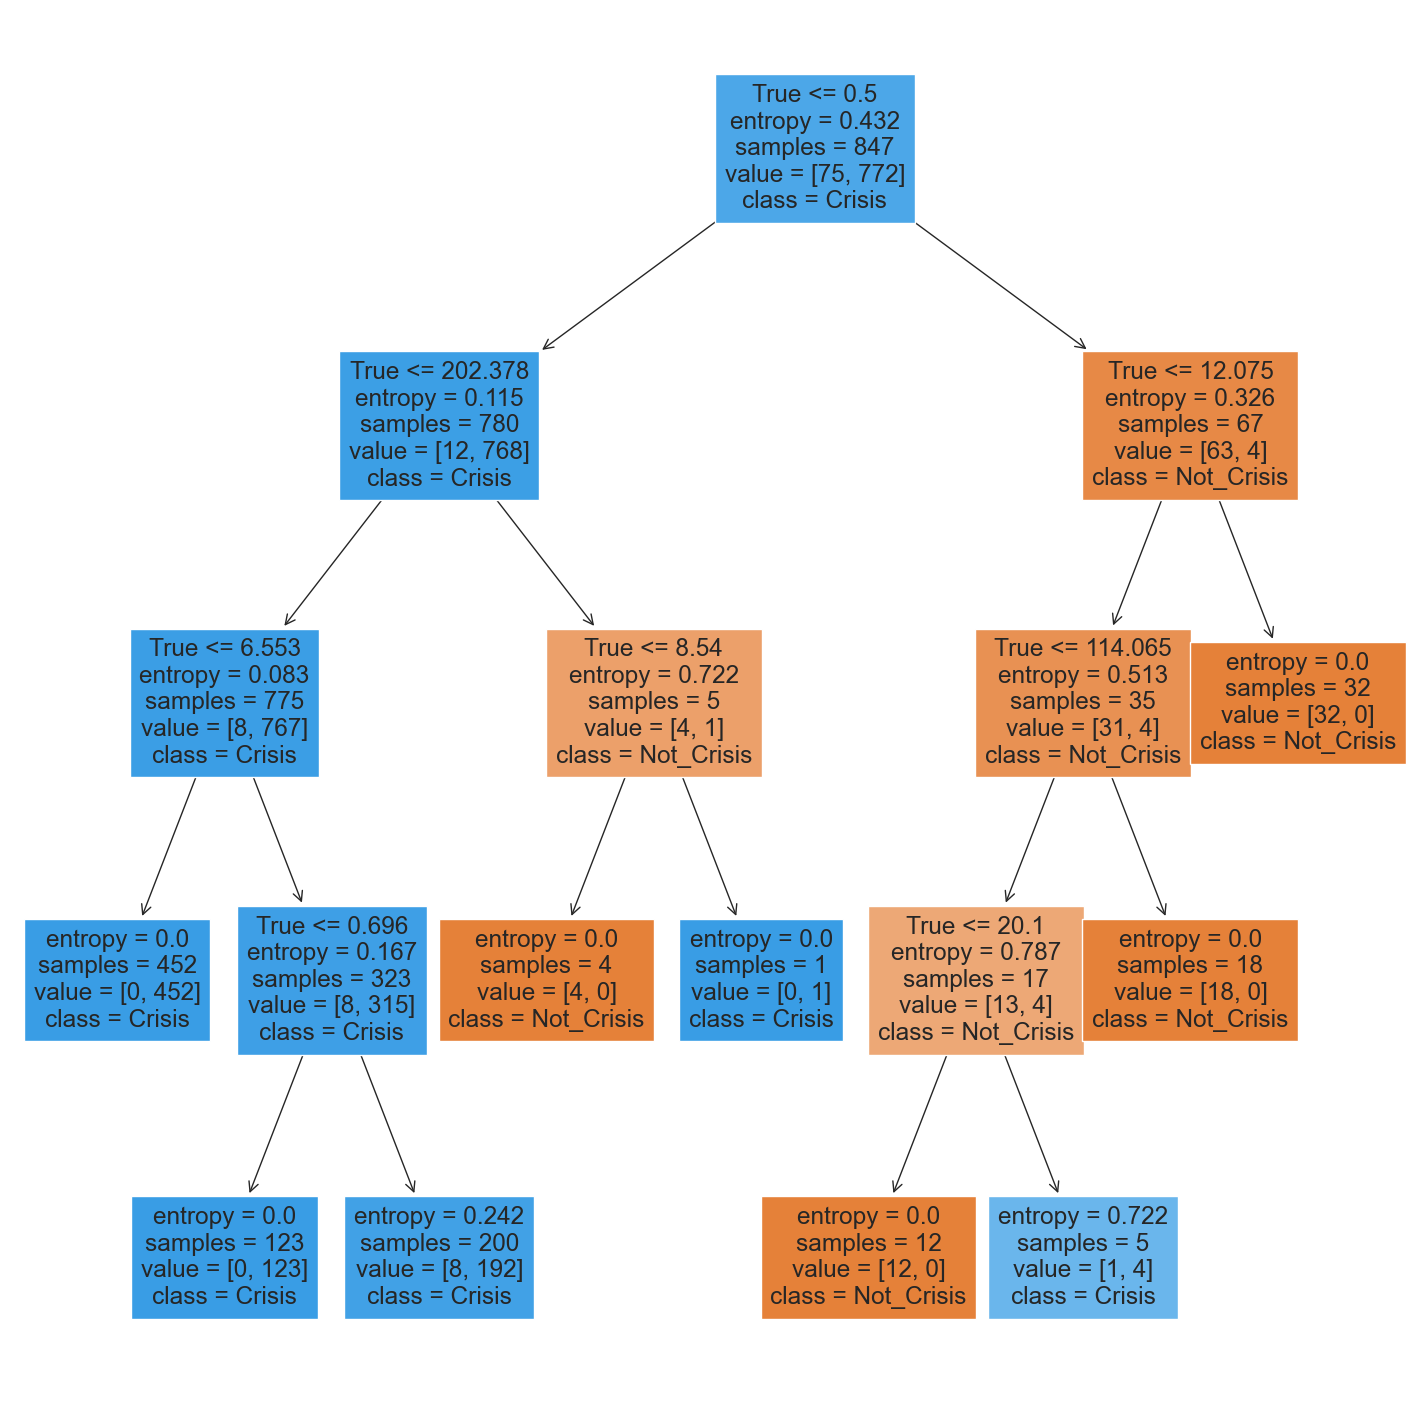

In [123]:
fig = plt.figure(figsize=(18, 18))
_ = tree.plot_tree(
    model,
    feature_names = independen,
    class_names = ['Not_Crisis', 'Crisis'],
    filled = True)

# Model Prediksi

In [124]:
input_data = (0,0.052798,0,0,0.0,14.14913958,0,0,0)
input_data_numpy = np.asarray(input_data)
data_reshaped = input_data_numpy.reshape(1, -1)
predik = model.predict(data_reshaped)
print(predik)

if (predik[0] == 0):
    print('Bank di negara tersebut mengalami krisis')
else:
    print('Bank di negara tersebut tidak krisis')

[1]
Bank di negara tersebut tidak krisis


c:\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Deployment

### Save Model

In [125]:
import pickle

filename = 'krisis_bankAfrika.sav'
pickle.dump(model, open(filename, 'wb'))